In [1]:
# import dependencies
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
# load the data
diabetes_df= pd.read_csv(Path('./Resources/diabetesatlascountydata.csv'))
fast_food_df= pd.read_csv(Path('./Resources/merged_fastfood_data.csv'))
population_df = pd.read_csv(Path('./Resources/number_people_area.csv'))

In [3]:
#Drop Null Values
diabetes_df = diabetes_df.dropna()
fast_food_df = fast_food_df.dropna()
population_df = population_df.dropna()

In [4]:
# Drop Duplicate rows diabetes
diabetes_df= diabetes_df.drop_duplicates()
diabetes_df

,County,State,CountyFIPS,Number,Lower Limit,Upper Limit
0,Kalawao County,Hawaii,15005.0,10.0,3.0,23.0
1,King County,Texas,48269.0,20.0,9.0,41.0
2,Arthur County,Nebraska,31005.0,23.0,9.0,46.0
3,Blaine County,Nebraska,31009.0,28.0,15.0,50.0
4,Kenedy County,Texas,48261.0,32.0,15.0,65.0
...,...,...,...,...,...,...
3214,Orange County,California,6059.0,206411.0,181489.0,235990.0
3215,Maricopa County,Arizona,4013.0,276140.0,263696.0,289218.0
3216,Harris County,Texas,48201.0,322085.0,283149.0,366035.0
3217,Cook County,Illinois,17031.0,372183.0,344762.0,398701.0


In [5]:
#drop duplicate rows fast food
fast_food_df= fast_food_df.drop_duplicates()
fast_food_df

,address,city,latitude,longitude,restaurant_name,postal_code,state_name
0,800 N Canal Blvd,Thibodaux,29.814697,-90.814742,SONIC Drive In,70301,Louisiana
2,206 Wears Valley Rd,Pigeon Forge,35.803788,-83.580553,Taco Bell,37863,Tennessee
3,3652 Parkway,Pigeon Forge,35.782339,-83.551408,Arby's,37863,Tennessee
4,2118 Mt Zion Parkway,Morrow,33.562738,-84.321143,Steak 'n Shake,30260,Georgia
5,9768 Grand River Ave,Detroit,42.368823,-83.138251,Wendy's,48204,Michigan
...,...,...,...,...,...,...,...
19993,3956 Guthrie St,East Chicago,41.640760,-87.433727,White Castle,46312,Indiana
19995,3013 Peach Orchard Rd,Augusta,33.415257,-82.024531,Wendy's,30906,Georgia
19996,678 Northwest Hwy,Cary,42.217300,-88.255800,Lee's Oriental Martial Arts,60013,Illinois
19997,1708 Main St,Longmont,40.189190,-105.101720,Five Guys,80501,Colorado


In [6]:
#drop unnecesary columns
statepopulation_df= population_df.drop(['STNAME', 'CTYNAME', 'POPESTIMATE2017'], axis = 1)
statepopulation_df

,State,State Population
0,Alabama,4874486.0
1,Alaska,739700.0
2,Arizona,7044008.0
3,Arkansas,3001345.0
4,California,39358497.0
5,Colorado,5611885.0
6,Connecticut,3573297.0
7,Delaware,956823.0
8,District of Columbia,694906.0
9,Florida,20963613.0


In [7]:
fastfood_state= fast_food_df.groupby(['state_name']).count()
fastfood_state

,address,city,latitude,longitude,restaurant_name,postal_code
state_name,,,,,,
Alabama,241,241,241,241,241,241
Alaska,28,28,28,28,28,28
Arizona,494,494,494,494,494,494
Arkansas,235,235,235,235,235,235
California,1761,1761,1761,1761,1761,1761
Colorado,290,290,290,290,290,290
Connecticut,147,147,147,147,147,147
Delaware,70,70,70,70,70,70
District of Columbia,21,21,21,21,21,21


In [8]:
#drop Puerto Rico
diabetes_df = diabetes_df[diabetes_df['State'] != 'Puerto Rico']
diabetes_df

,County,State,CountyFIPS,Number,Lower Limit,Upper Limit
0,Kalawao County,Hawaii,15005.0,10.0,3.0,23.0
1,King County,Texas,48269.0,20.0,9.0,41.0
2,Arthur County,Nebraska,31005.0,23.0,9.0,46.0
3,Blaine County,Nebraska,31009.0,28.0,15.0,50.0
4,Kenedy County,Texas,48261.0,32.0,15.0,65.0
...,...,...,...,...,...,...
3214,Orange County,California,6059.0,206411.0,181489.0,235990.0
3215,Maricopa County,Arizona,4013.0,276140.0,263696.0,289218.0
3216,Harris County,Texas,48201.0,322085.0,283149.0,366035.0
3217,Cook County,Illinois,17031.0,372183.0,344762.0,398701.0


In [9]:
diabetes_state= diabetes_df.groupby(['State']).sum()
diabetes_state

,CountyFIPS,Number,Lower Limit,Upper Limit
State,,,,
Alabama,71489.0,530018.0,423376.0,653637.0
Alaska,62340.0,44862.0,35670.0,56028.0
Arizona,60208.0,501839.0,461769.0,544070.0
Arkansas,380625.0,299417.0,223719.0,393623.0
California,351364.0,2593251.0,2180781.0,3065568.0
Colorado,515983.0,278905.0,232239.0,333230.0
Connecticut,72064.0,249166.0,229325.0,269912.0
Delaware,30009.0,85505.0,79631.0,91630.0
District of Columbia,11001.0,44352.0,42156.0,46601.0


In [10]:
#Join Fast food & diabetes data frames by State
diabetes_state.index.names = ['state_name']
joined_df= pd.merge(fastfood_state, diabetes_state, on='state_name', how='outer')

In [11]:
joined_df

,address,city,latitude,longitude,restaurant_name,postal_code,CountyFIPS,Number,Lower Limit,Upper Limit
state_name,,,,,,,,,,
Alabama,241,241,241,241,241,241,71489.0,530018.0,423376.0,653637.0
Alaska,28,28,28,28,28,28,62340.0,44862.0,35670.0,56028.0
Arizona,494,494,494,494,494,494,60208.0,501839.0,461769.0,544070.0
Arkansas,235,235,235,235,235,235,380625.0,299417.0,223719.0,393623.0
California,1761,1761,1761,1761,1761,1761,351364.0,2593251.0,2180781.0,3065568.0
Colorado,290,290,290,290,290,290,515983.0,278905.0,232239.0,333230.0
Connecticut,147,147,147,147,147,147,72064.0,249166.0,229325.0,269912.0
Delaware,70,70,70,70,70,70,30009.0,85505.0,79631.0,91630.0
District of Columbia,21,21,21,21,21,21,11001.0,44352.0,42156.0,46601.0


In [12]:
# convert to csv
joined_df.to_csv(r'Resources/joined_df.csv', index=False)

In [13]:
#Delete extra columns
clean_joined_df= joined_df.drop(['address', 'city', 'latitude', 'longitude', 'postal_code', 'CountyFIPS', 'Lower Limit', 'Upper Limit'], axis = 1)
clean_joined_df

,restaurant_name,Number
state_name,,
Alabama,241,530018.0
Alaska,28,44862.0
Arizona,494,501839.0
Arkansas,235,299417.0
California,1761,2593251.0
Colorado,290,278905.0
Connecticut,147,249166.0
Delaware,70,85505.0
District of Columbia,21,44352.0


In [14]:
#Rename columns
clean_joined_df = clean_joined_df.rename(columns={"restaurant_name": "number_of_restaurants", "Number": "number_of_diabetes_cases"})
clean_joined_df

,number_of_restaurants,number_of_diabetes_cases
state_name,,
Alabama,241,530018.0
Alaska,28,44862.0
Arizona,494,501839.0
Arkansas,235,299417.0
California,1761,2593251.0
Colorado,290,278905.0
Connecticut,147,249166.0
Delaware,70,85505.0
District of Columbia,21,44352.0


In [15]:
#Add population
population = statepopulation_df.rename(columns={"State": "state_name"})
joined_population_df = pd.merge(population, clean_joined_df, on='state_name', how='outer')
joined_population_df

,state_name,State Population,number_of_restaurants,number_of_diabetes_cases
0,Alabama,4874486.0,241,530018.0
1,Alaska,739700.0,28,44862.0
2,Arizona,7044008.0,494,501839.0
3,Arkansas,3001345.0,235,299417.0
4,California,39358497.0,1761,2593251.0
5,Colorado,5611885.0,290,278905.0
6,Connecticut,3573297.0,147,249166.0
7,Delaware,956823.0,70,85505.0
8,District of Columbia,694906.0,21,44352.0
9,Florida,20963613.0,1026,1762208.0


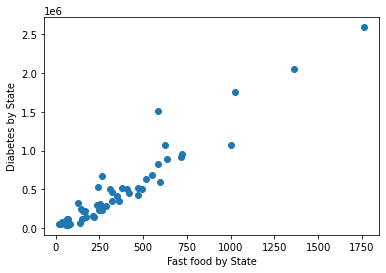

In [16]:
# plot the data
plt.scatter(fastfood_state.restaurant_name, diabetes_state.Number)
plt.xlabel('Fast food by State')
plt.ylabel('Diabetes by State')
plt.show()

In [17]:
# define the x variable
X = fastfood_state.restaurant_name.values.reshape(-1, 1)
X[:5]
X.shape

(51, 1)

In [18]:
# define the y variable
y = diabetes_state.Number

In [19]:
# # instantiate the model
# model = LinearRegression()

In [20]:
# # fit the model
# model.fit(X, y)

In [21]:
# # generate predictions
# y_pred = model.predict(X)
# print(y_pred.shape)

In [22]:
# # plot the predictions
# plt.scatter(X, y)
# plt.plot(X, y_pred, color='red')
# plt.show()

In [23]:
# # examine the specific parameters of our model: the slope and the y-intercept
# print(model.coef_)
# print(model.intercept_)

In [24]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

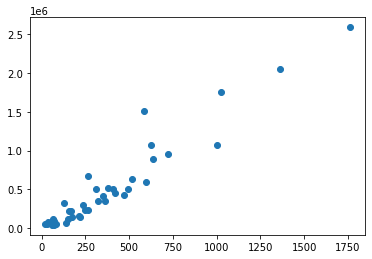

In [25]:
from sklearn.linear_model import LinearRegression as lm
model=lm().fit(X_train,y_train)
predictions=model.predict(X_test)
import matplotlib.pyplot as plt
plt.scatter(X_train,y_train)
plt.show()

ValueError: x and y must have same first dimension, but have shapes (51, 1) and (11,)

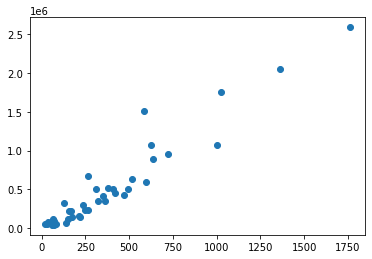

In [26]:
# plot the predictions
plt.scatter(X_train, y_train)
plt.plot(X, predictions, color='red')
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, predictions))

In [ ]:
# examine the specific parameters of our model: the slope and the y-intercept
print(model.coef_)
print(model.intercept_)